<a href="https://colab.research.google.com/github/takaito1/EAS6305_F24/blob/main/week1/Sample_assignment_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EAS4305/6305 Sample Assignment Report #1

## Taka Ito

### The goal of this homework is to experience getting oceanographic dataset from an ocean time series station. Visit the Bermuda Ocean Time Series (BATS) https://www.bco-dmo.org/dataset/3918Links to an external site.

- Part 1. Obtaining the CTD data from the BCO-DMO database
- Part 2. Calculate absolute salinity and compare it to practical salinity
- Part 3. Calculate conservative temperature and compare it to temperature
- Part 4. Calculate density and potential density
- Part 5. Examine chlorophyll fluorescense from multiple casts

In [14]:
! pip install gsw

In [15]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import gsw
import pandas as pd

## Part 1. Obtain the CTD data from BCO-DMO database

In [16]:
# Step 1 download data from BATS
df = pd.read_csv('https://datadocs.bco-dmo.org/file/m7zA3onuPG01JD/3918_v10_bats_ctd_2020-2024.csv')
df.head() # display the first 5 rows

,ID,ISO_DateTime_UTC_deployed,ISO_DateTime_UTC_recovered,Vessel,Latitude_deployed,Longitude_deployed,Latitude_recovered,Longitude_recovered,Cruise_type,Cruise_num,...,Oxygen,QF_Oxygen,BAC,QF_BAC,Flu,QF_Flu,PAR,QF_PAR,Decimal_Year_deployed,Decimal_Year_recovered
0,10367001,2020-01-21T12:09Z,2020-01-21T12:18Z,R/V Atlantic Explorer,32.3824,-64.6154,32.3834,-64.6156,BATS Core,10367,...,215.86,2,NaN,4,0.223,2,65.44,2,2020.056028,2020.056045
1,10367001,2020-01-21T12:09Z,2020-01-21T12:18Z,R/V Atlantic Explorer,32.3824,-64.6154,32.3834,-64.6156,BATS Core,10367,...,215.28,2,0.370,2,0.153,2,19.66,2,2020.056028,2020.056045
2,10367001,2020-01-21T12:09Z,2020-01-21T12:18Z,R/V Atlantic Explorer,32.3824,-64.6154,32.3834,-64.6156,BATS Core,10367,...,216.47,2,0.435,2,0.152,2,16.67,2,2020.056028,2020.056045
3,10367001,2020-01-21T12:09Z,2020-01-21T12:18Z,R/V Atlantic Explorer,32.3824,-64.6154,32.3834,-64.6156,BATS Core,10367,...,216.97,2,0.431,2,0.150,2,11.92,2,2020.056028,2020.056045
4,10367001,2020-01-21T12:09Z,2020-01-21T12:18Z,R/V Atlantic Explorer,32.3824,-64.6154,32.3834,-64.6156,BATS Core,10367,...,218.39,2,0.432,2,0.153,2,7.41,2,2020.056028,2020.056045


In [17]:
# define headers first (since the excel sheet doesn't have one)
headers = df.columns
print(headers)

Index(['ID', 'ISO_DateTime_UTC_deployed', 'ISO_DateTime_UTC_recovered',
       'Vessel', 'Latitude_deployed', 'Longitude_deployed',
       'Latitude_recovered', 'Longitude_recovered', 'Cruise_type',
       'Cruise_num', 'Cast', 'Depth', 'QF_Depth', 'Pressure', 'QF_Pressure',
       'Temperature', 'QF_Temperature', 'Salinity', 'QF_Salinity', 'Oxygen',
       'QF_Oxygen', 'BAC', 'QF_BAC', 'Flu', 'QF_Flu', 'PAR', 'QF_PAR',
       'Decimal_Year_deployed', 'Decimal_Year_recovered'],
      dtype='object')


In [18]:
# extract a specific parameter from specific cast / cruise
new_df = df.loc[(df.Cruise_num==10370)&(df.Cast==1)]
T = new_df['Temperature']
S = new_df['Salinity']
P = new_df['Pressure']
lon = new_df['Longitude_deployed']
lat = new_df['Latitude_deployed']

### Part 2. Calculate absolute salinity

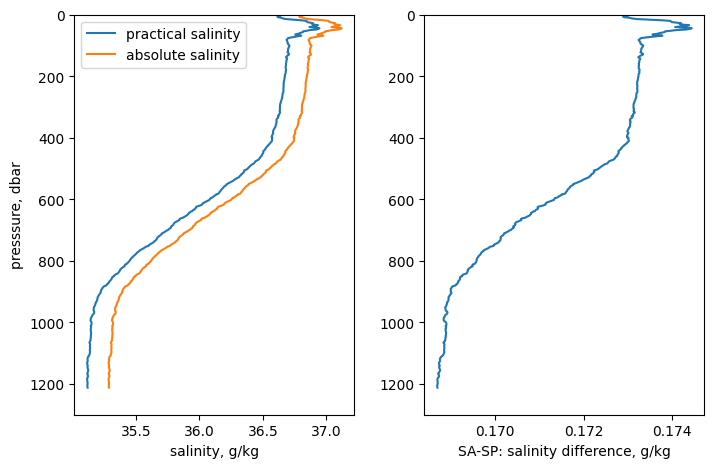

In [19]:
# now calculate absolute salinity
sa = gsw.SA_from_SP(S,P,lon,lat)
#
fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot([.05,.1,.4,.8])
ax.plot(S,P,label='practical salinity')
ax.plot(sa,P,label='absolute salinity')
ax.set_ylim(1300,0)
ax.legend()
ax.set_xlabel('salinity, g/kg')
ax.set_ylabel('presssure, dbar')
#
ax=fig.add_subplot([.55,.1,.4,.8])
ax.plot(sa - S,P)
ax.set_ylim(1300,0)
ax.set_xlabel('SA-SP: salinity difference, g/kg')
plt.show()

## Comment on the difference between SA and SP

Practical salinity (SP) is measured by the CTD sensor. The absolute salinity depends on the minor constituents that cannot be directly measured by the CTD sensor alone. Absolute salinity (SA) is computed using SP, pressure, longitude and latitude of the measurements to include the effects of minor constituents.

The comparison shows approximately the difference of 0.17g/kg where SA is higher than the SP at the location of BATS.  